In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from reference import get_file_names, get_histplot
import seaborn as sns

In [2]:
# get the col reference table
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')

In [3]:
print(get_file_names(['IDEHR', 'EHRType', 'chk_stato_danimo'], df_ref))    # mood
print(get_file_names(['IDEHR', 'EHRType', 'stato_danimo'], df_ref))    # mood

['wH_DirectTable_C_VISITA_MED_VIDAS', 'wH_DirectTable_VISITA_MED_VIDAS']
['wH_DirectTable_C_VISITA_OSS_VIDAS', 'wH_DirectTable_VISITA_OSS_VIDAS']


In [4]:
# pain relief
print(get_file_names(['IDEHR', 'EHRType', 'Sollievo_dolore'], df_ref))

['wH_DirectTable_C_DOLORE_MED_e_INF_VIDAS', 'wH_DirectTable_DOLORE_MED_e_INF_VIDAS']


In [5]:
df_referral = pd.read_csv('./vidas_data/survival_time.csv')
print(df_referral.shape)
df_referral.head()

(5563, 7)


,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref
0,3263,2015-10-02 07:50:00.000,AMB,2015-09-21 10:00:18.743,10.0,Liver-Biliary,1550
1,1414,2015-10-05 11:50:00.000,EHR,2015-10-02 15:45:06.800,2.0,Myeloid Leukemia,28983
2,3394,2015-10-06 03:25:00.000,AMB,2015-09-25 18:17:56.940,10.0,Lung,1629
3,3417,2015-10-05 15:00:00.000,AMB,2015-09-28 17:26:59.413,6.0,Skin,1739
4,2977,2015-10-06 06:00:00.000,AMB,2015-09-08 11:26:31.850,27.0,Palliative (Non-Malignant),1


In [6]:
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_MED_VIDAS.csv')
df_obs = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType'])
df_obs.shape

C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (16,17,18,19,20,21,22,50,97,98,100,116,142) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(57242, 175)

<Figure size 1080x576 with 0 Axes>

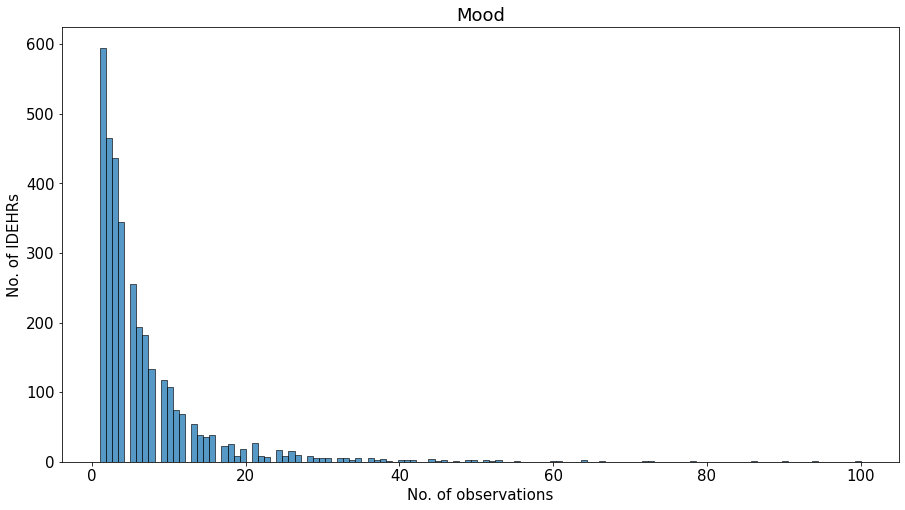

In [7]:
# plot the distribution of entries 
get_histplot('chk_stato_danimo', df_obs, 'Mood')

In [8]:
df_obs[['IDEHR', 'chk_stato_danimo']].dropna().IDEHR.value_counts()

6762     100
17895     94
15430     90
10253     86
13985     78
        ... 
3690       1
2815       1
7217       1
23593      1
17219      1
Name: IDEHR, Length: 3399, dtype: int64

In [9]:
with pd.option_context("display.max_rows", 1000):
    print(df_obs[['IDEHR', 'chk_stato_danimo']].dropna().loc[df_obs['IDEHR'] == 6762])

       IDEHR                                   chk_stato_danimo
53644   6762                                demoralizzazione#03
53645   6762                                demoralizzazione#03
53648   6762                                    irritabilità#05
53649   6762                                demoralizzazione#03
53650   6762                       demoralizzazione#03;paura#08
53651   6762                       demoralizzazione#03;paura#08
53652   6762                       demoralizzazione#03;paura#08
53653   6762                                           paura#08
53654   6762                                demoralizzazione#03
53655   6762                                demoralizzazione#03
53656   6762                                demoralizzazione#03
53657   6762                                demoralizzazione#03
53658   6762                                demoralizzazione#03
53659   6762                      apatia#00;demoralizzazione#03
53660   6762                      apatia